In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
%qtconsole

In [3]:
%cd /Users/guchunhui/Documents/cgvae
%pwd

/Users/guchunhui/Documents/cgvae


/Users/guchunhui/opt/anaconda3/envs/cgvae/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


'/Users/guchunhui/Documents/cgvae'

In [13]:
df = pd.read_json('results/results2.json', lines=True)

In [14]:
# calculate mean and std for auc and ap group by dataset and split_ratio
df_agg = df.groupby(['dataset', 'split_ratio', 'regularization']).agg({'AUC': ['mean', 'std'], 'AP': ['mean', 'std'], 'execution_time': ['mean', 'std'], 'best_epochs': 'mean'})
# ungroup the index
df_agg = df_agg.reset_index()

In [15]:
df_agg[df_agg['dataset'] == 'Cora'].sort_values(by=['split_ratio', 'regularization'], ascending=False)

dataset split_ratio regularization      AUC                 AP            \
                                         mean       std     mean       std   
5    Cora         0.5         100000  0.59311  0.017653  0.61783  0.020927   
4    Cora         0.5          10000  0.69396  0.037983  0.71547  0.036430   
3    Cora         0.5           1000  0.68840  0.056791  0.71624  0.051273   
2    Cora         0.5            100  0.65928  0.052403  0.68914  0.046871   
1    Cora         0.5             10  0.65407  0.049427  0.68280  0.043794   
0    Cora         0.5              0  0.65444  0.048728  0.68300  0.042982   

  execution_time           best_epochs  
            mean       std        mean  
5          5.270  0.126842        21.9  
4         20.865  4.604691       814.6  
3         15.610  6.411464       506.9  
2         12.296  5.782580       358.8  
1         11.721  5.978159       322.6  
0         11.598  6.643934       324.1

# plot AUC for each dataset and each split_ratio, with regularization in x-axis



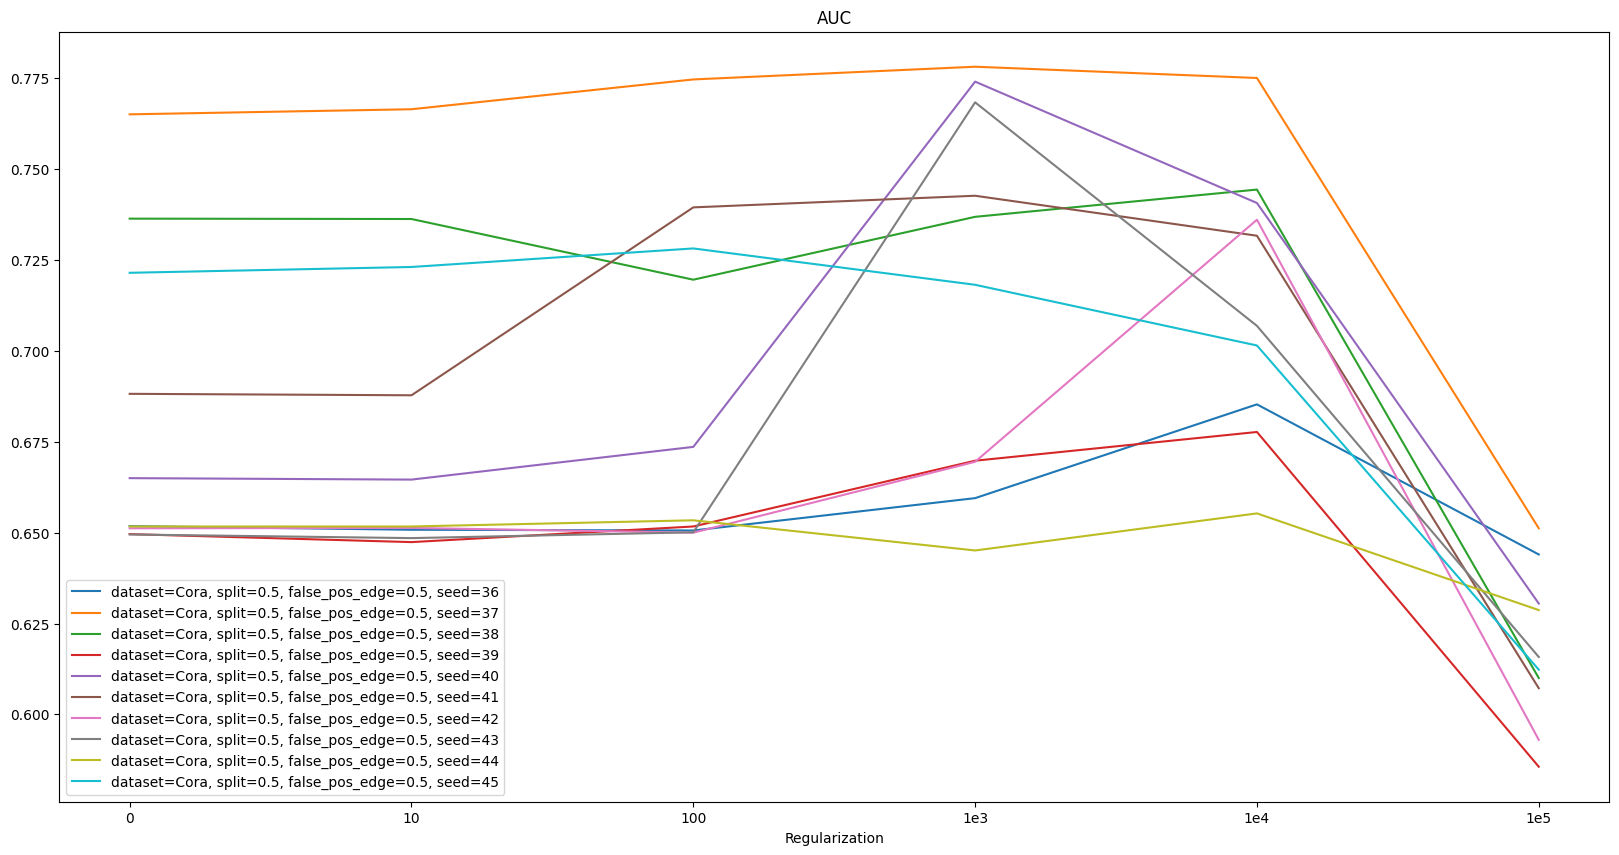

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))

# Get unique seeds
dataset = 'Cora'
split = 0.5
false_pos_edge = 0.5
seeds = df['seed'].unique()

# plot AUC
for seed in seeds:
    ax.plot([0, 1, 2, 3, 4, 5], df[(df['seed'] == seed)]['AP'],
               label=f'dataset={dataset}, split={split}, false_pos_edge={false_pos_edge}, seed={seed}')

ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(['0', '10', '100', '1e3', '1e4', '1e5'])
ax.set_xlabel('Regularization')
ax.set_title('AUC')
ax.legend()

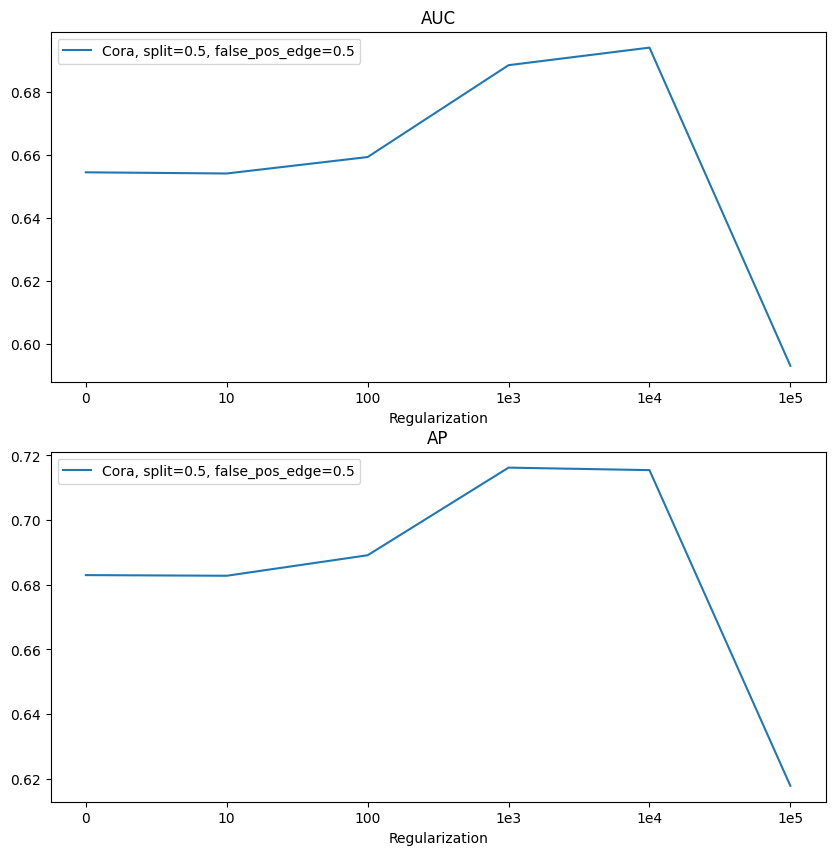

In [24]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# plot AUC
ax[0].plot([0, 1, 2, 3, 4, 5],
           df_agg[(df_agg['dataset'] == dataset)]['AUC']['mean'], label=f'{dataset}, split=0.5, false_pos_edge=0.5')
# ax[0].errorbar([0, 1, 2, 3, 4, 5],
#                df_agg[(df_agg['dataset'] == dataset)]['AUC']['mean'],
#                yerr=df_agg[(df_agg['dataset'] == dataset)]['AUC']['std'], fmt='o')
ax[0].set_xticks([0, 1, 2, 3, 4, 5])
ax[0].set_xticklabels(['0', '10', '100', '1e3', '1e4', '1e5'])
ax[0].set_xlabel('Regularization')
ax[0].set_title('AUC')
ax[0].legend()

# plot AP
ax[1].plot([0, 1, 2, 3, 4, 5],
           df_agg[(df_agg['dataset'] == dataset)]['AP']['mean'], label=f'{dataset}, split=0.5, false_pos_edge=0.5')
# ax[1].errorbar([0, 1, 2, 3, 4, 5],
#                df_agg[(df_agg['dataset'] == dataset)]['AP']['mean'],
#                yerr=df_agg[(df_agg['dataset'] == dataset)]['AP']['std'], fmt='o')
ax[1].set_xticks([0, 1, 2, 3, 4, 5])
ax[1].set_xticklabels(['0', '10', '100', '1e3', '1e4', '1e5'])
ax[1].set_xlabel('Regularization')
ax[1].set_title('AP')
ax[1].legend()

Text(0.5, 1.0, 'Execution Time')

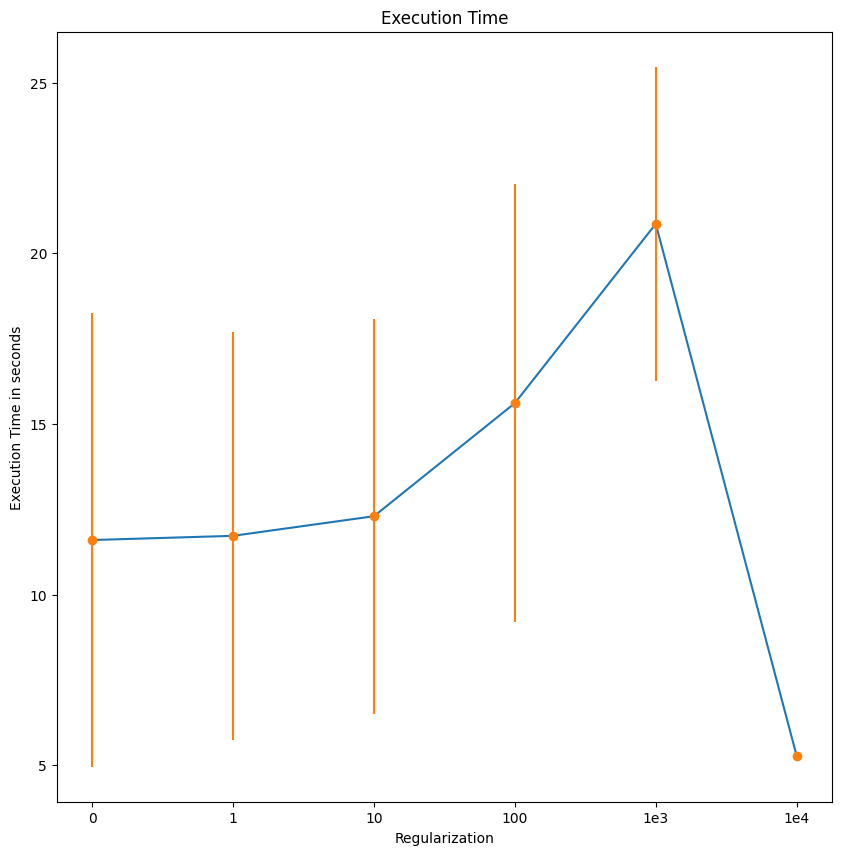

In [18]:
# plot execution time over different regularization
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot([0, 1, 2, 3, 4, 5], df_agg[(df_agg['dataset'] == dataset)]['execution_time']['mean'], label=f'{dataset}, split=0.5, false_pos_edge=0.5')
ax.errorbar([0, 1, 2, 3, 4, 5],
               df_agg[(df_agg['dataset'] == dataset)]['execution_time']['mean'],
               yerr=df_agg[(df_agg['dataset'] == dataset)]['execution_time']['std'], fmt='o')
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(['0', '1', '10', '100', '1e3', '1e4'])
ax.set_xlabel('Regularization')
ax.set_ylabel('Execution Time in seconds')
ax.set_title('Execution Time')

Text(0.5, 1.0, 'Execution Time')

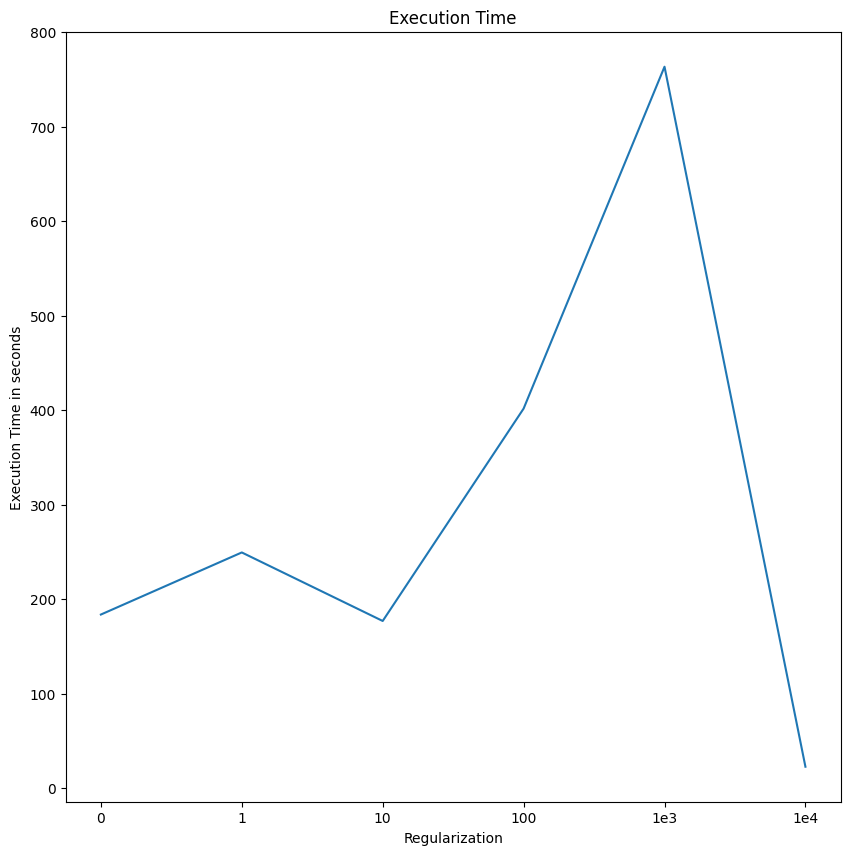

In [10]:
# plot execution time over different regularization
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot([0, 1, 2, 3, 4, 5], df_agg[(df_agg['dataset'] == dataset)]['best_epochs']['mean'], label=f'{dataset}, split=0.5, false_pos_edge=0.5')
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(['0', '1', '10', '100', '1e3', '1e4'])
ax.set_xlabel('Regularization')
ax.set_ylabel('Execution Time in seconds')
ax.set_title('Execution Time')